In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
import pandas as pd
company_df = pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")

In [72]:
company_df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


In [73]:
company_df.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Out of all these columns, Bankrupt column is highly correlated with ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax, Net Income to Total Assets, Net Income to Stockholder's Equity,Liability to Equity

# Exploratory Data Analysis

# Univariate Analysis

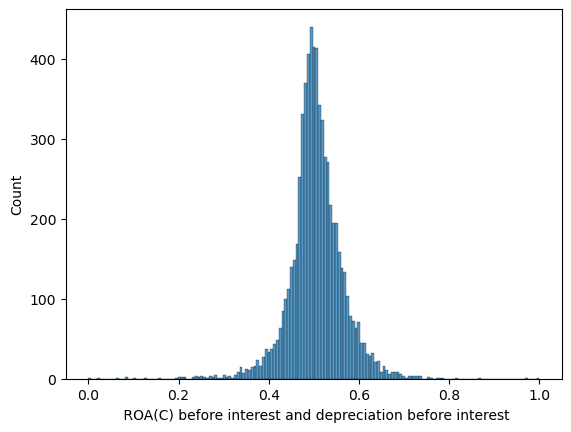

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=company_df,x=' ROA(C) before interest and depreciation before interest')
plt.show()

Maximum companies have the variable = 0.5 

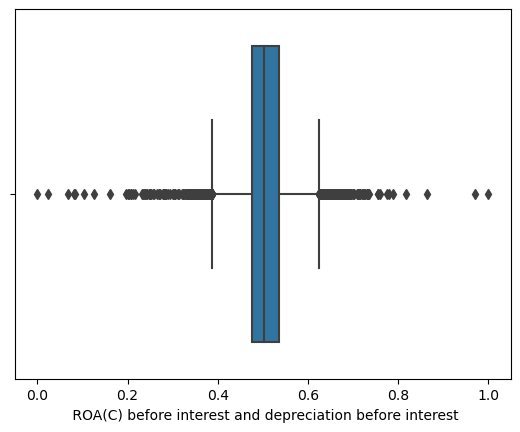

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=company_df,x=' ROA(C) before interest and depreciation before interest')
plt.show()

Not skewed, median = 0.5,minimum value=0.0 and maximum value=1.0

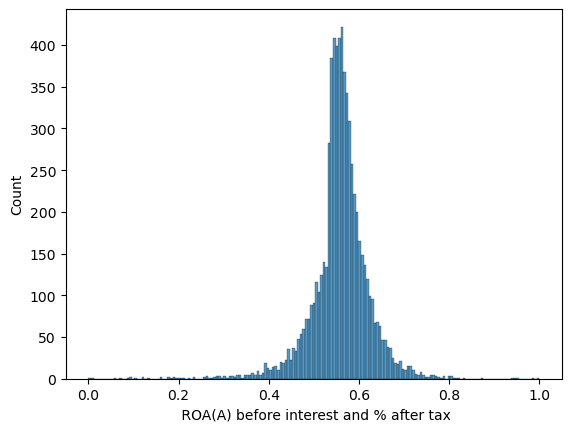

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=company_df,x=' ROA(A) before interest and % after tax')
plt.show()

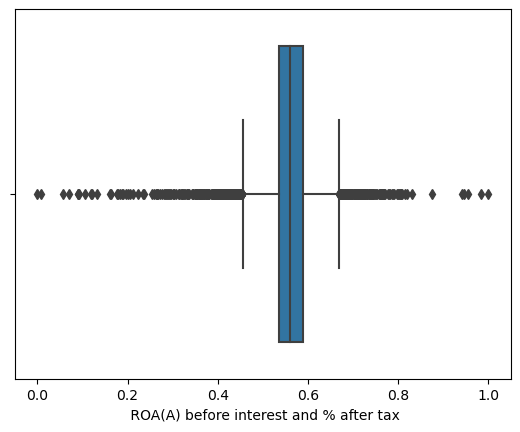

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=company_df,x=' ROA(A) before interest and % after tax')
plt.show()

Outliers exist, not skewed, Median ROA is more than 0.5, minimum ROA is 0.0 and maximum ROA is 1.0.

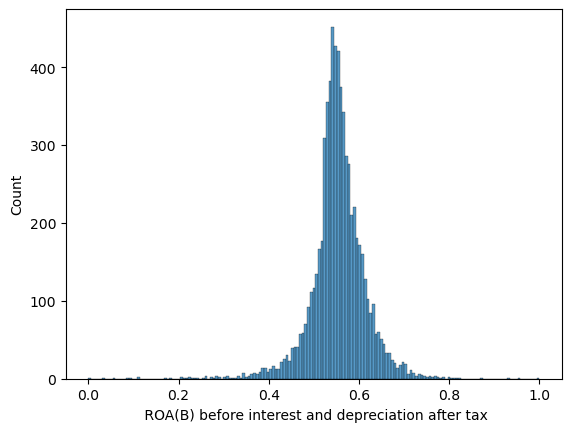

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=company_df,x=' ROA(B) before interest and depreciation after tax')
plt.show()

More than 400 companies have ROA around 0.5.

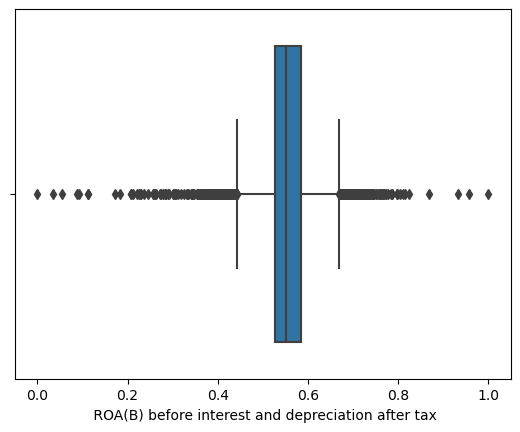

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=company_df,x=' ROA(B) before interest and depreciation after tax')
plt.show()

Left skewed,outliers exist,Median ROA is more than 0.5, minimum ROA is 0.0 and maximum ROA is 1.0.

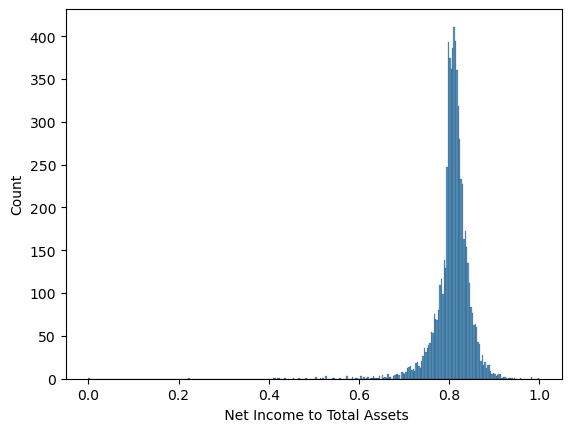

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=company_df,x=' Net Income to Total Assets')
plt.show()

400 companies have 0.8 as the ratio of net income to total assets

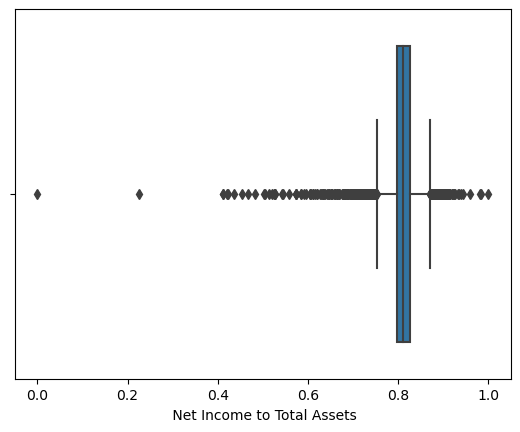

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=company_df,x=' Net Income to Total Assets')
plt.show()

median=0.8, outliers exist,smaller IQR

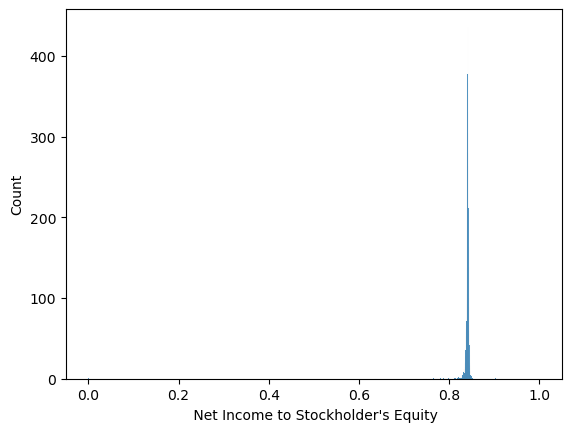

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=company_df,x=' Net Income to Stockholder\'s Equity')
plt.show()

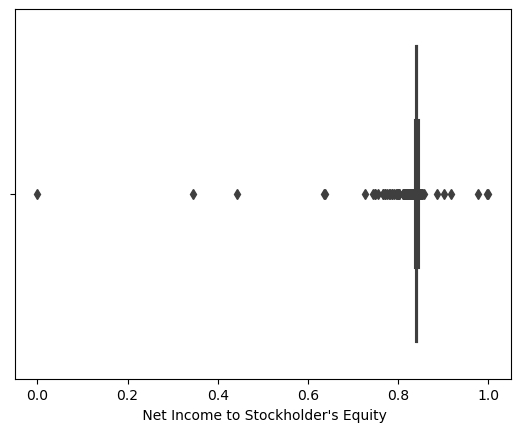

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=company_df,x=' Net Income to Stockholder\'s Equity')
plt.show()

very small IQR

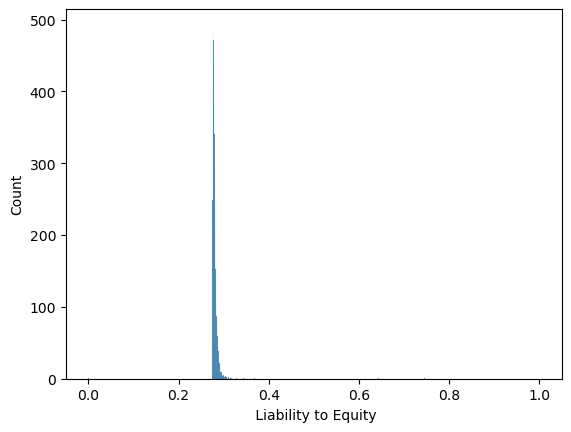

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=company_df,x=' Liability to Equity')
plt.show()

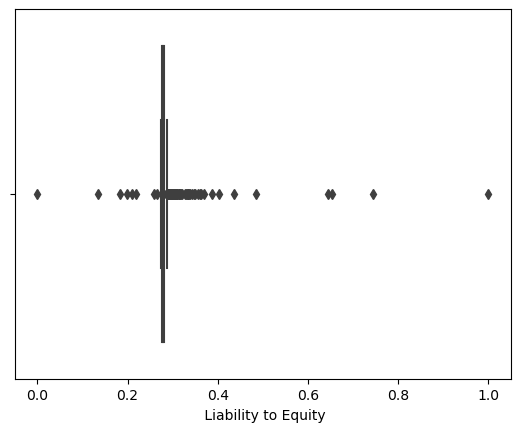

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=company_df,x=' Liability to Equity')
plt.show()

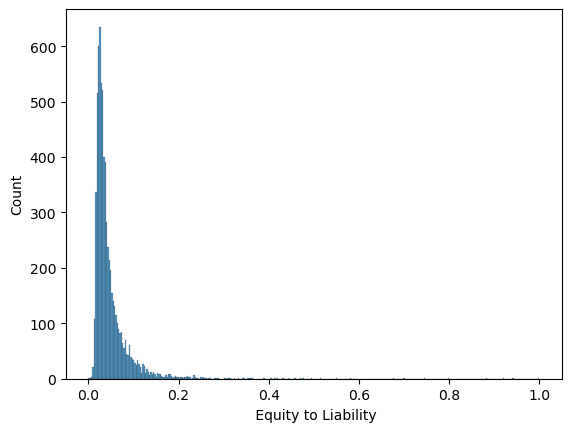

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=company_df,x=' Equity to Liability')
plt.show()

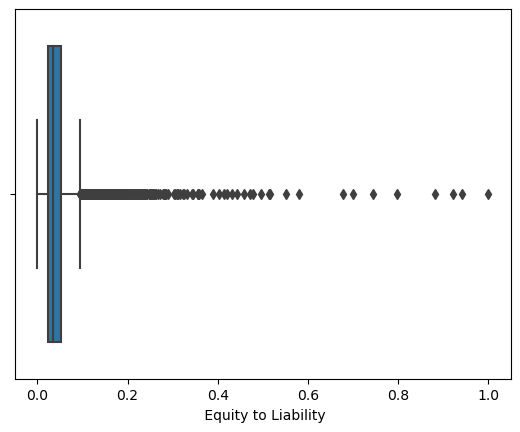

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=company_df,x=' Equity to Liability')
plt.show()

left skewed, majority of the companies have more liabilities than their equities

# Bivariate

Out of all these columns, Bankrupt column is highly correlated with ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax, Net Income to Total Assets, Net Income to Stockholder's Equity,Liability to Equity

In [88]:
company_df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

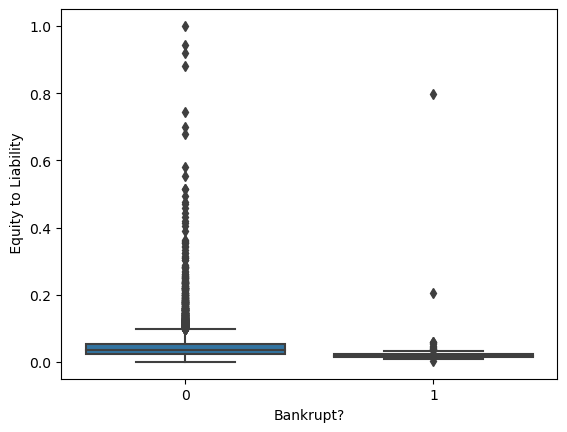

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=company_df,y=' Equity to Liability',x='Bankrupt?')
plt.show()

Bankrupt companies have very small IQR, and have less Equity to Liability ratio as compared to not Bankrupt companies.

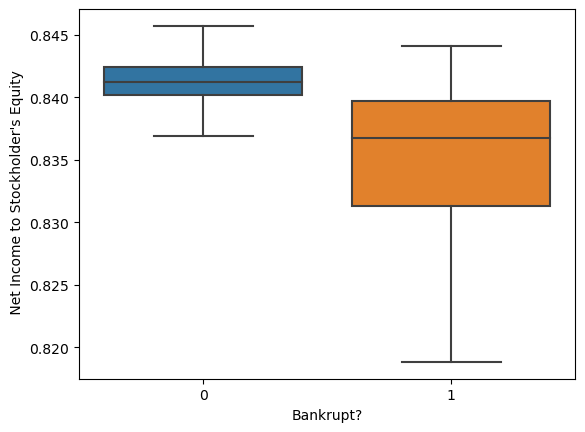

In [90]:
sns.boxplot(data=company_df,y=' Net Income to Stockholder\'s Equity',x='Bankrupt?',showfliers=False)
plt.show()

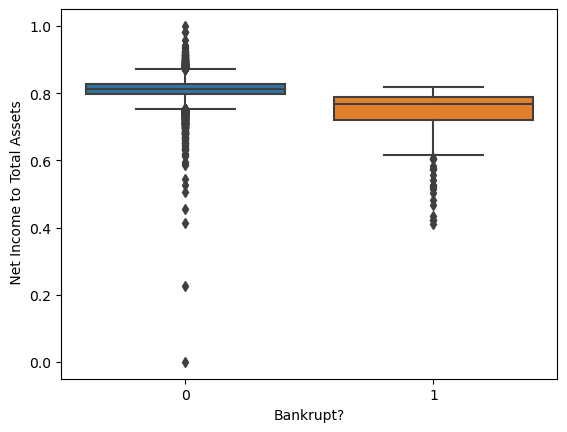

In [91]:
sns.boxplot(data=company_df,y=' Net Income to Total Assets',x='Bankrupt?')
plt.show()

- right skewed for bankrupt companies
- max net income to assets ratio=0.8 for bankrupt companies
- bankrupt cmpanies have less net income.

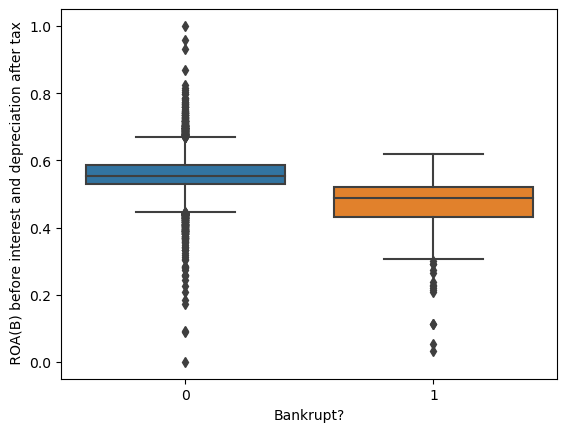

In [92]:
sns.boxplot(data=company_df,y=' ROA(B) before interest and depreciation after tax',x='Bankrupt?')
plt.show()

Since there is a difference between Interquartile range of bankrupt companies and non-bankrupt companies, ROA(B) before interest and depreciation after tax is a useful feature.

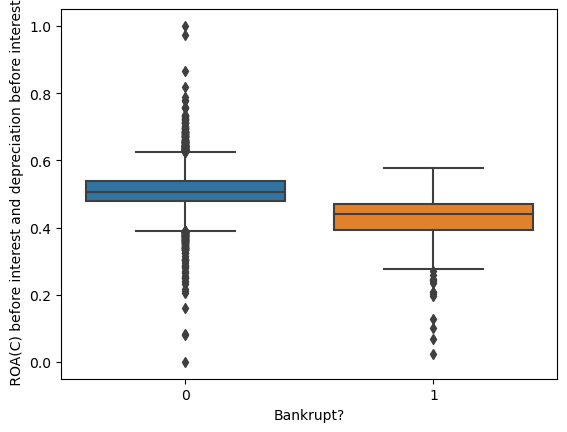

In [93]:
sns.boxplot(data=company_df,y=' ROA(C) before interest and depreciation before interest',x='Bankrupt?')
plt.show()

Since there is a difference between Interquartile range of bankrupt companies and non-bankrupt companies, ROA(A) before interest and % after tax is a useful feature.

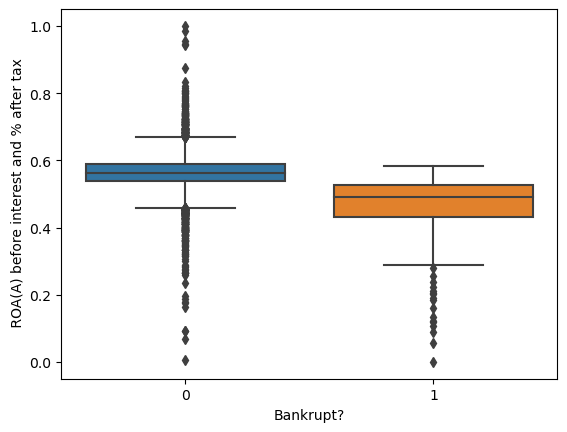

In [94]:
sns.boxplot(data=company_df,y=' ROA(A) before interest and % after tax',x='Bankrupt?')
plt.show()

Since there is a difference between Interquartile range of bankrupt companies and non-bankrupt companies, ROA(A) before interest and % after tax is a useful feature.

In [95]:
len(company_df.columns)

96

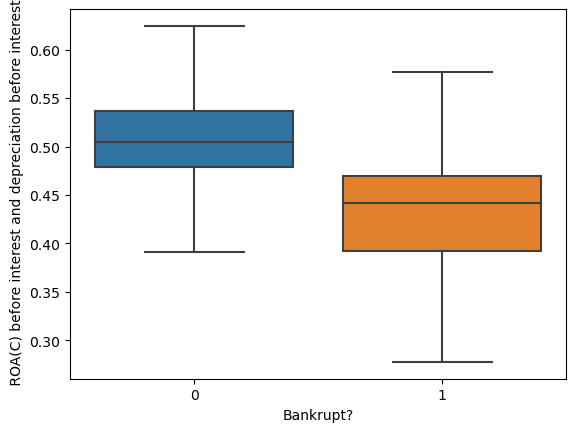

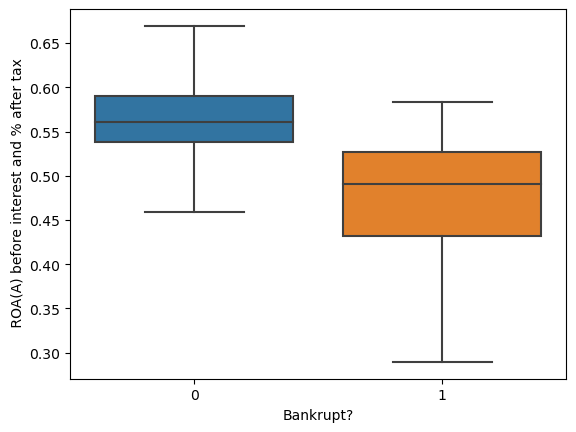

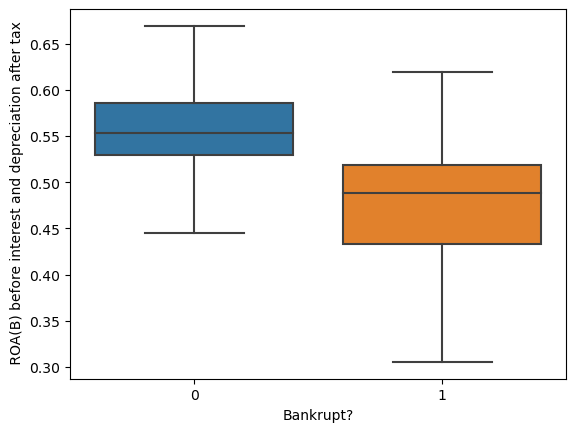

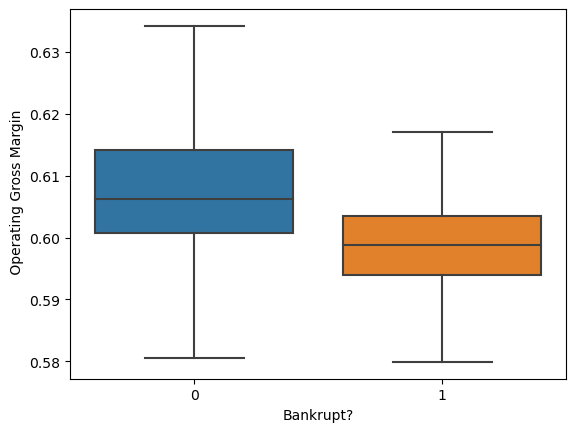

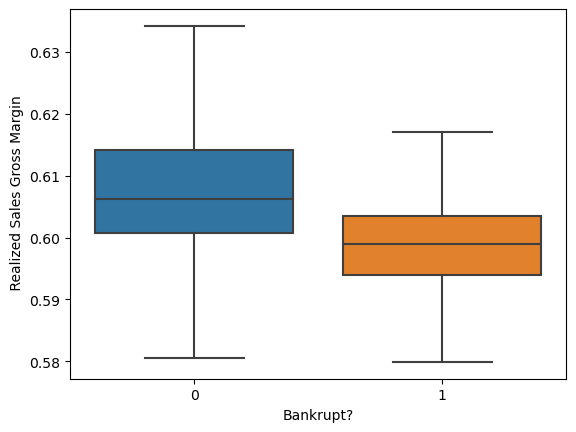

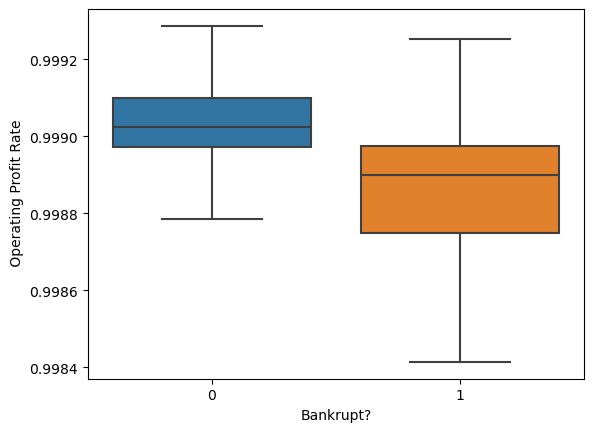

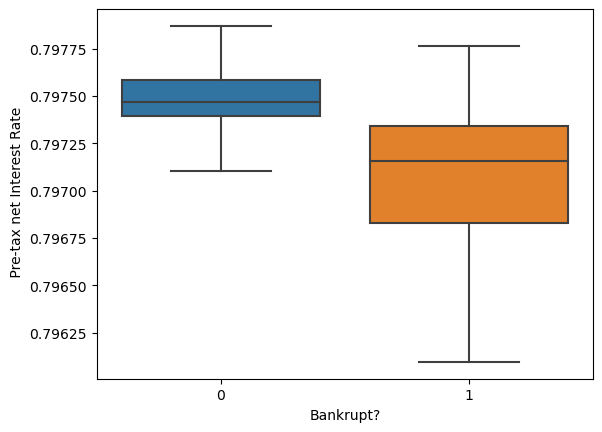

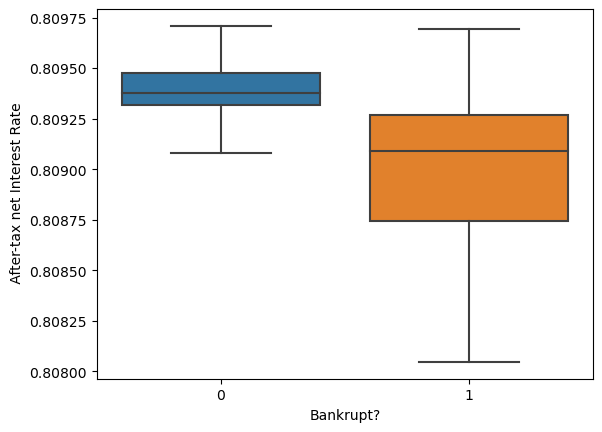

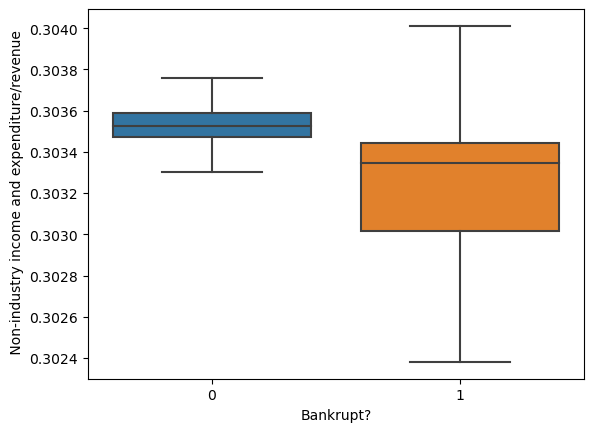

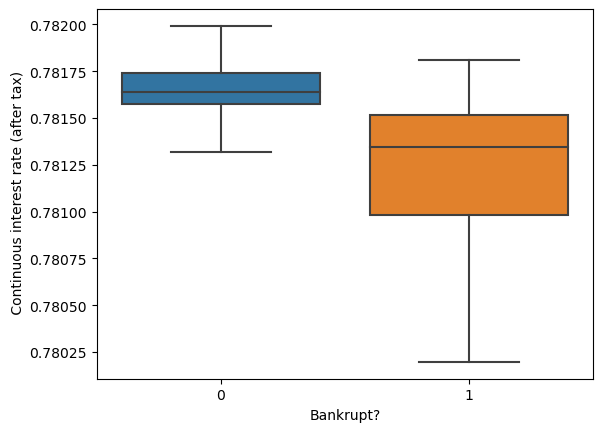

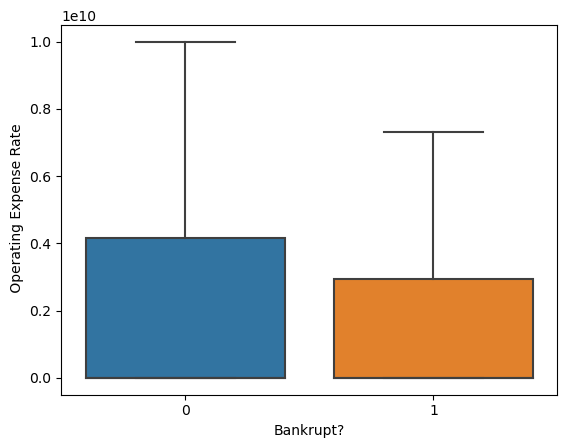

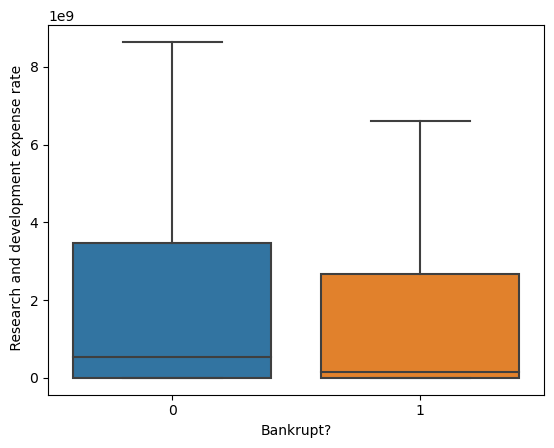

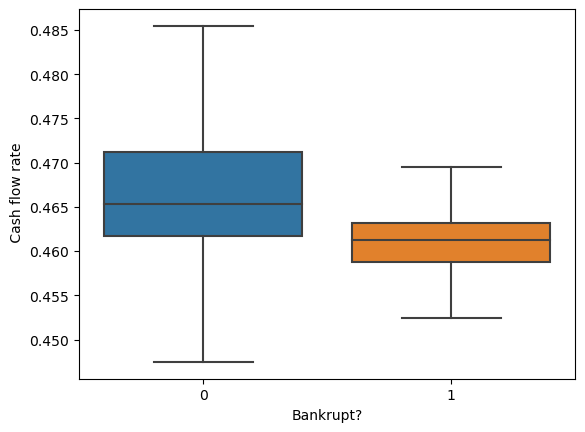

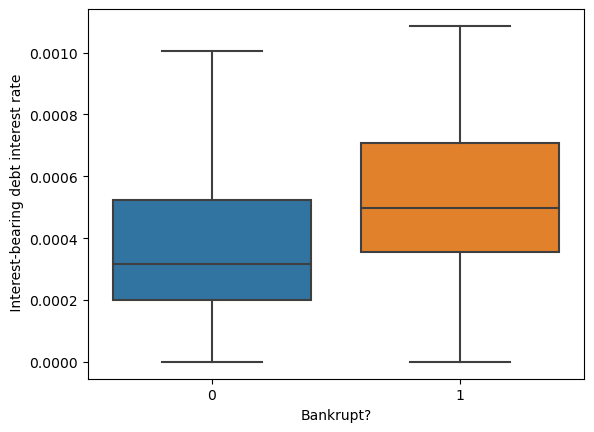

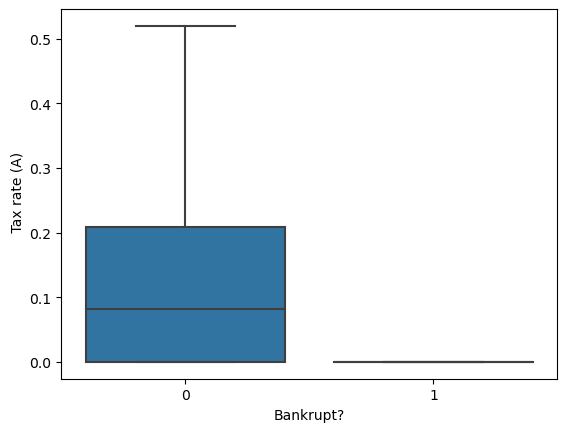

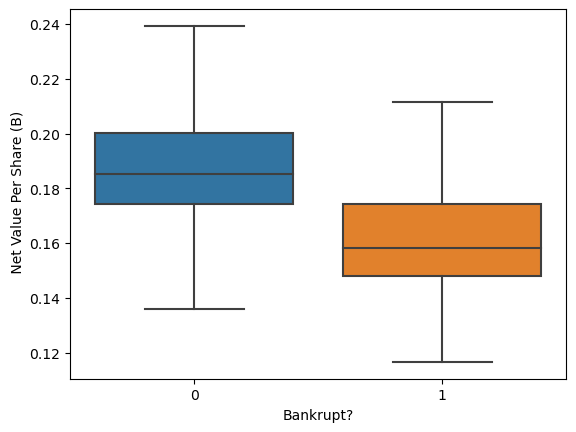

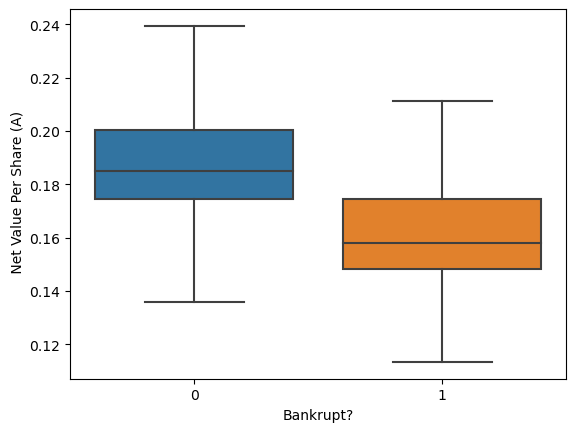

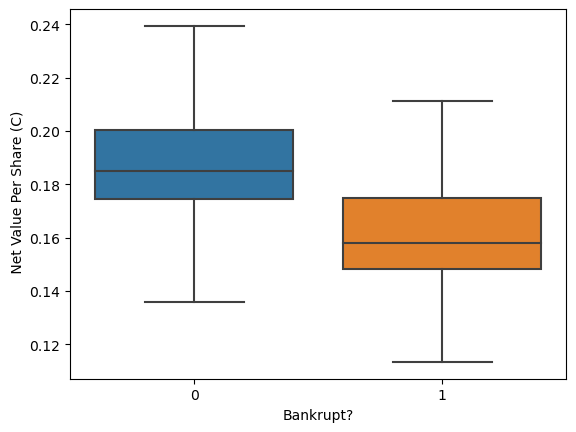

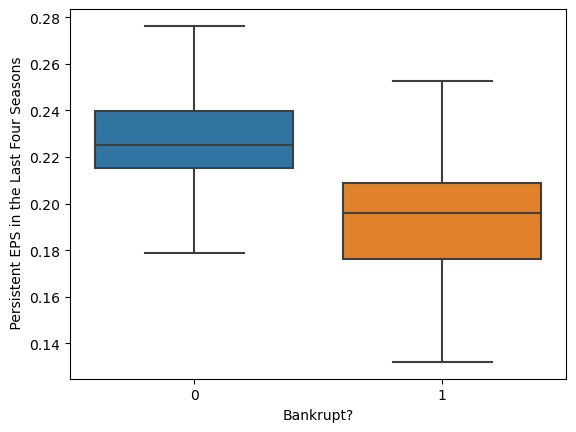

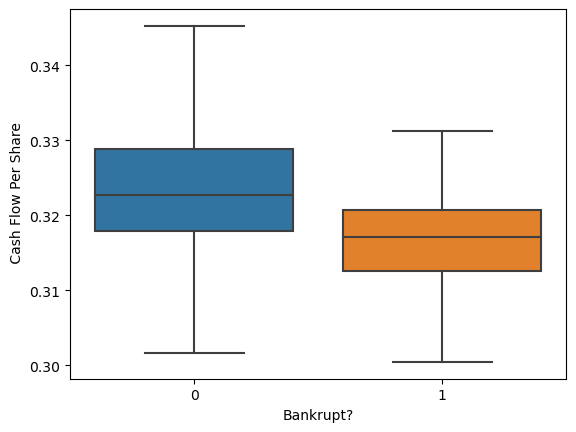

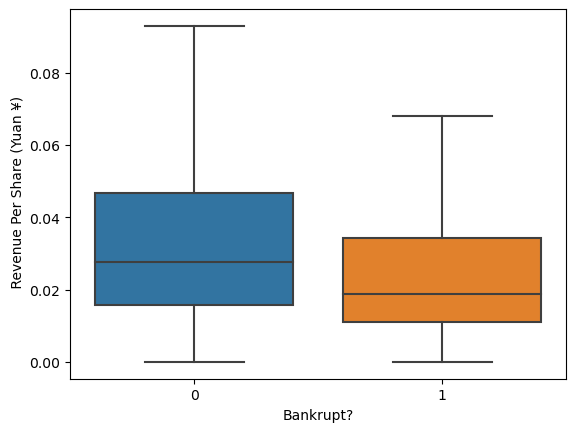

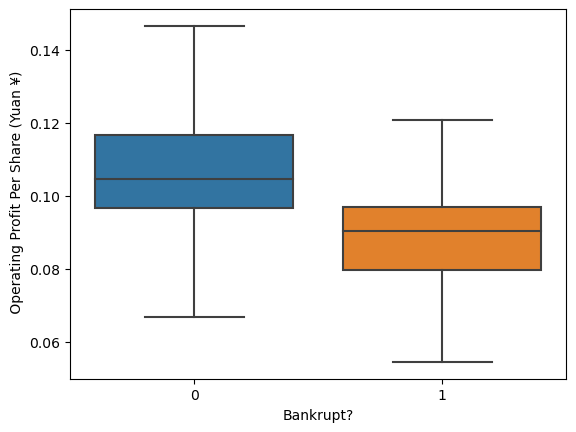

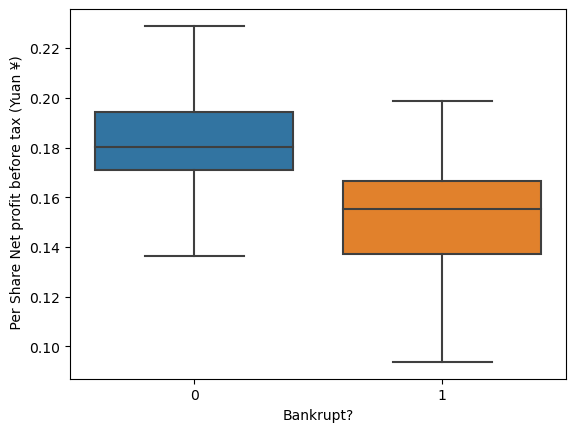

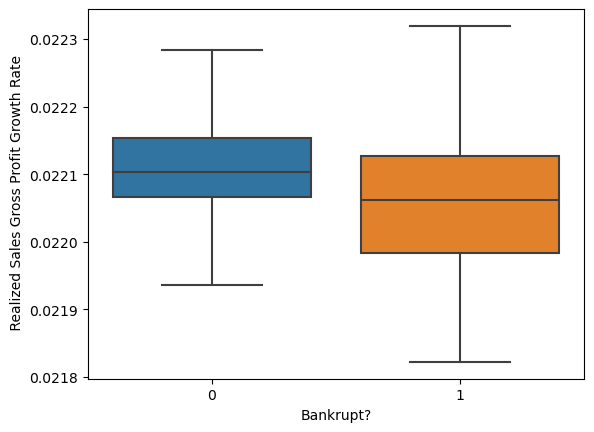

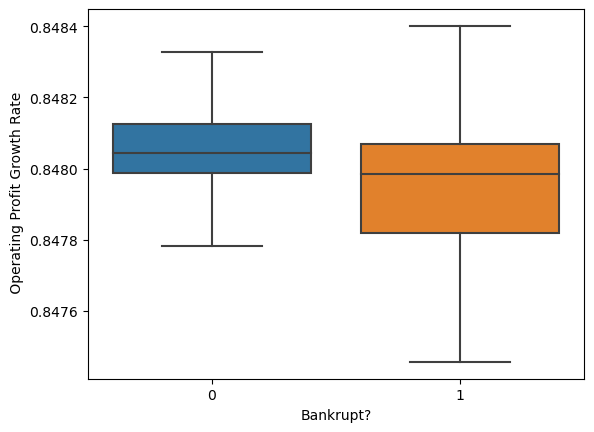

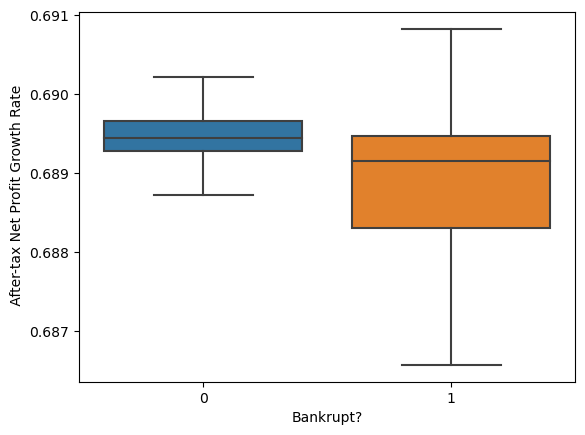

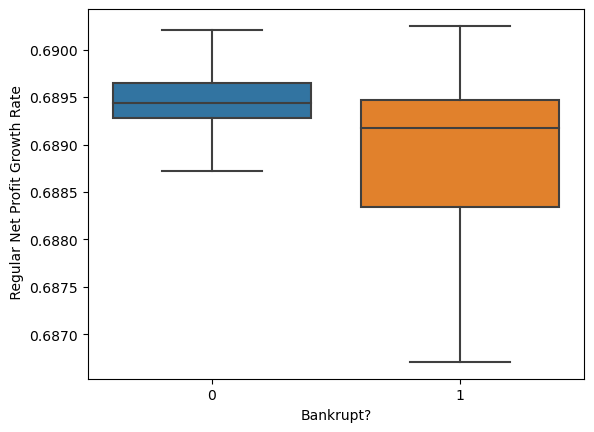

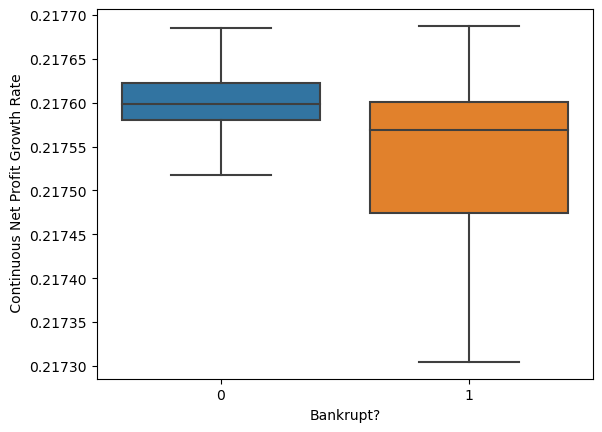

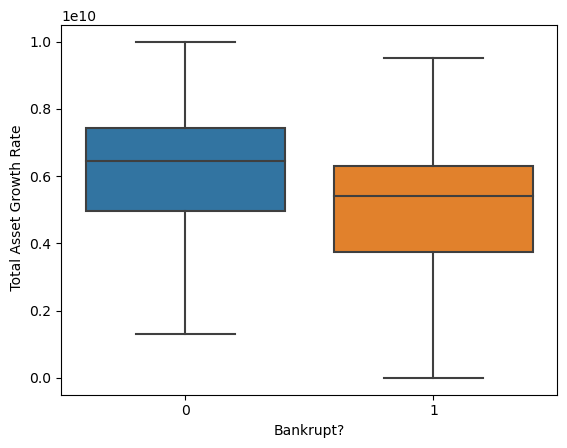

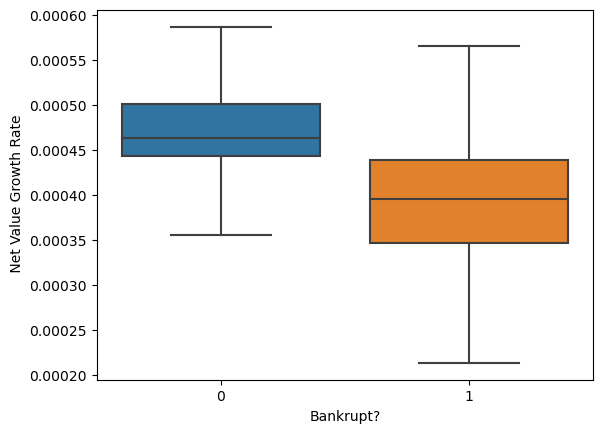

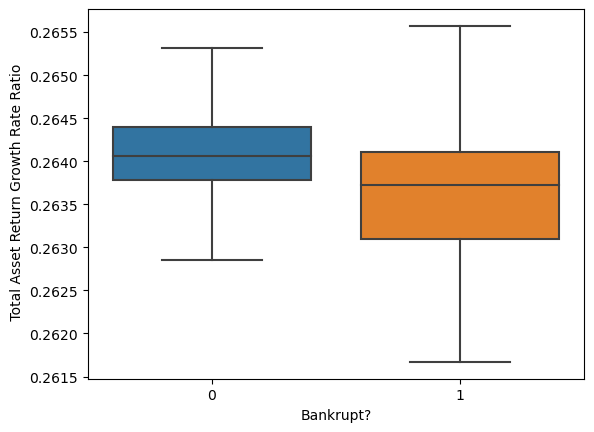

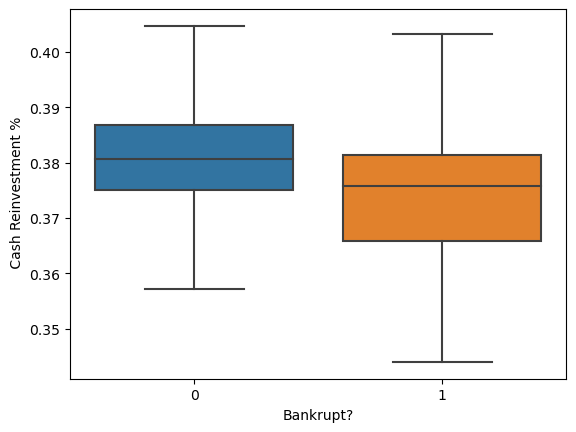

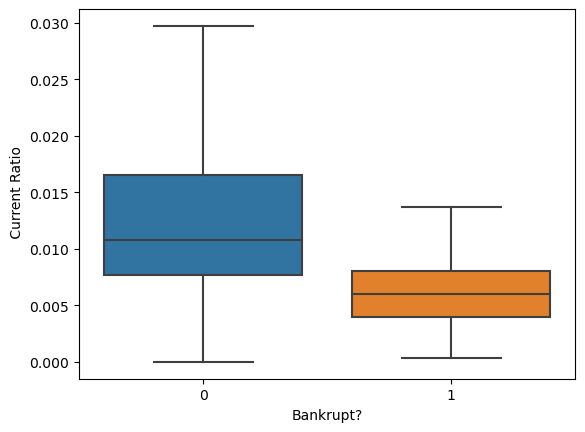

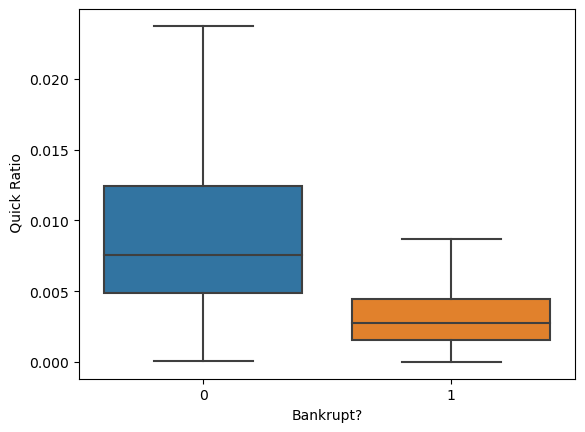

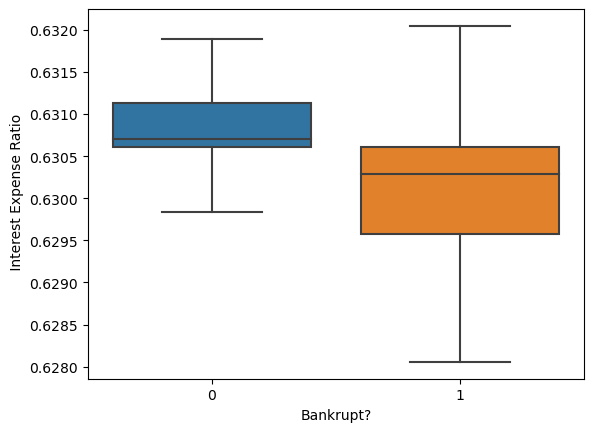

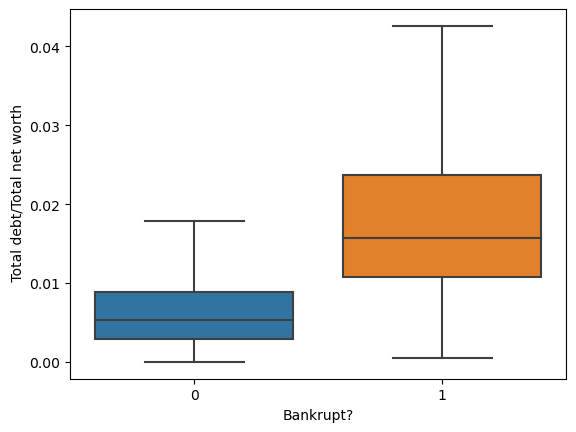

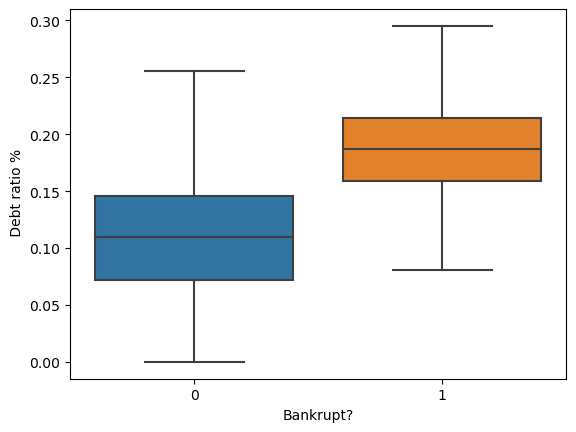

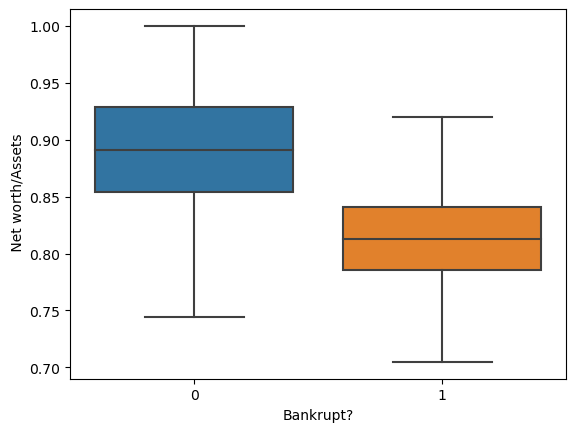

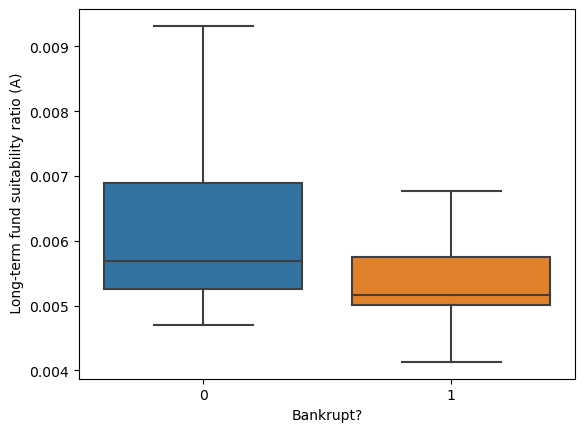

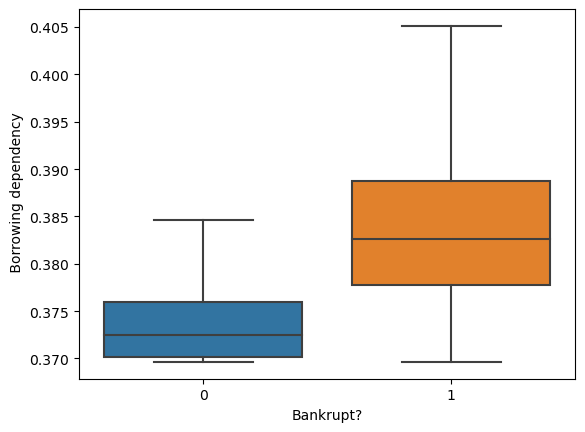

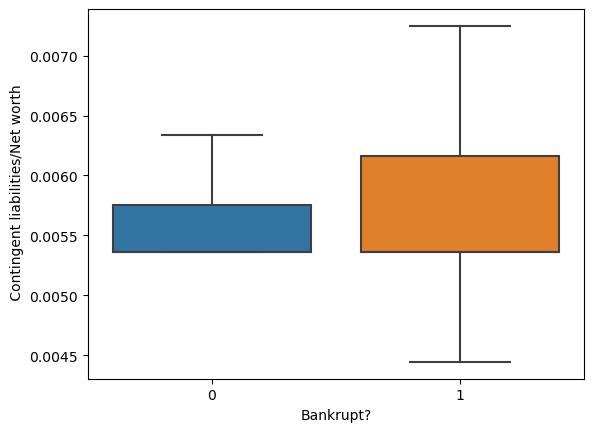

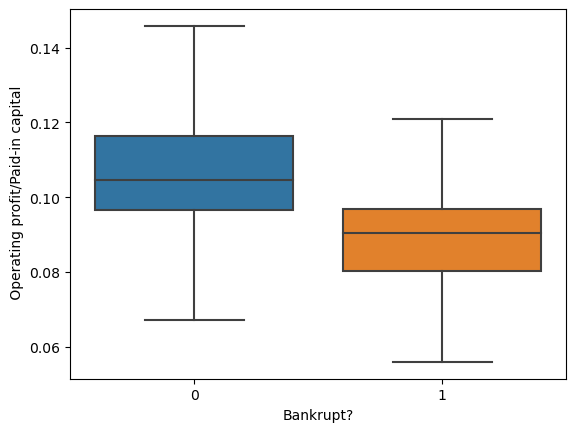

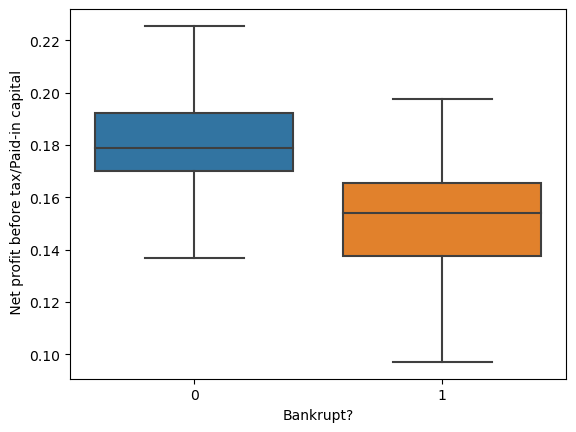

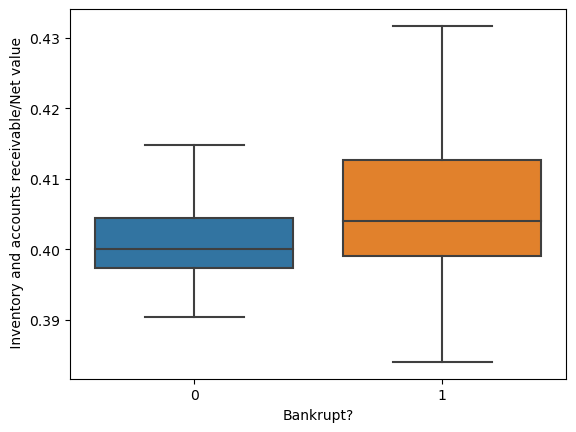

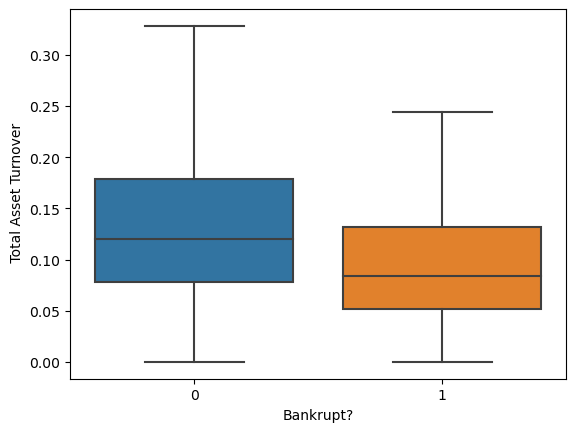

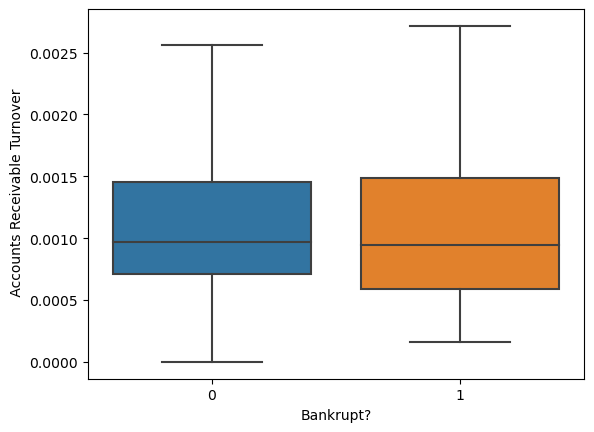

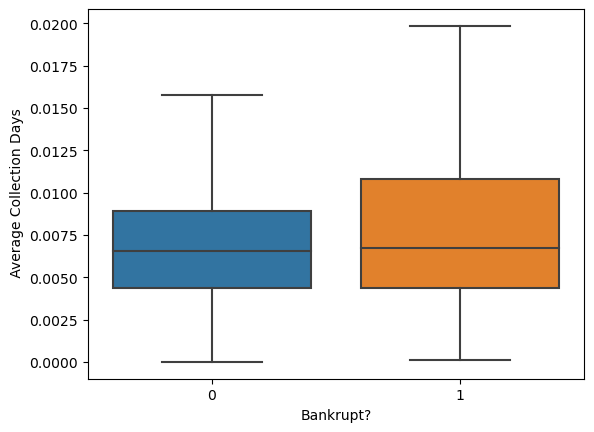

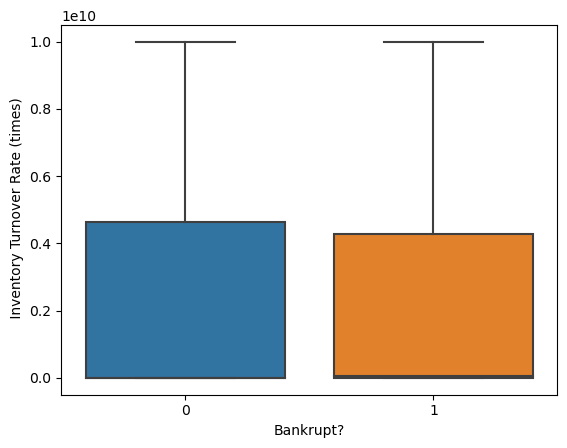

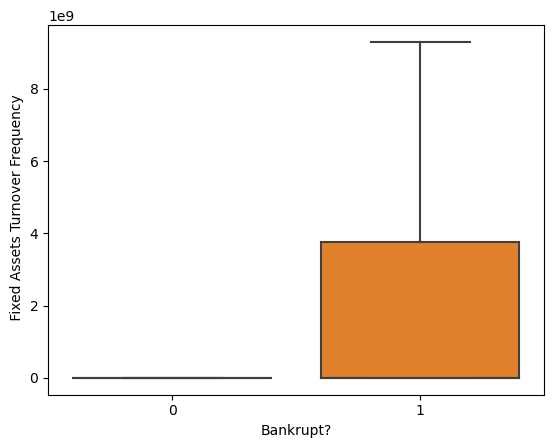

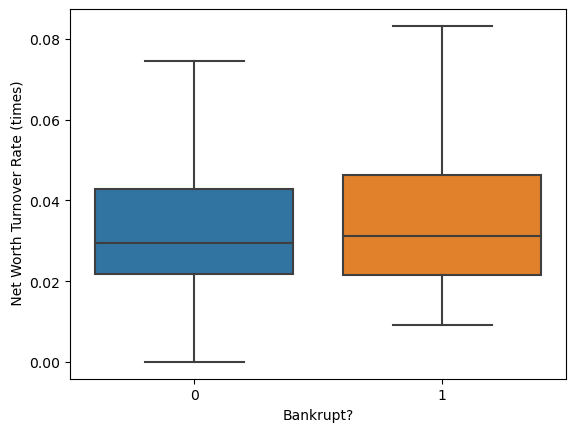

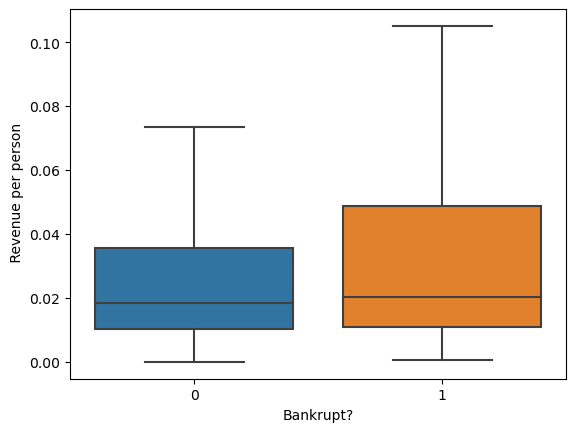

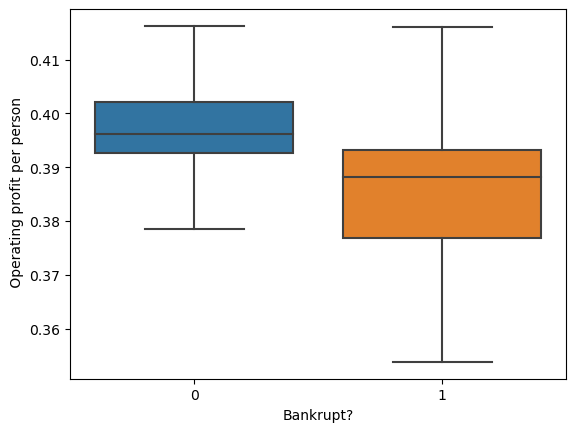

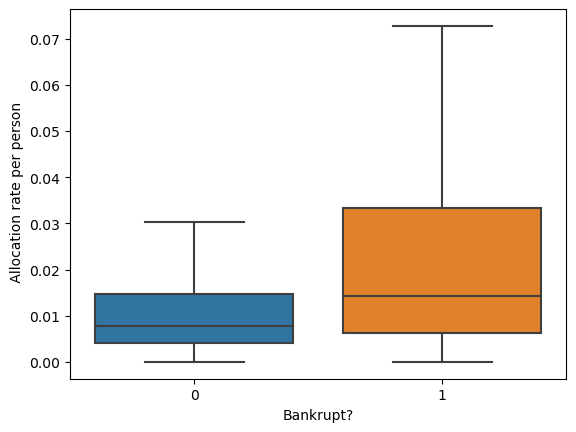

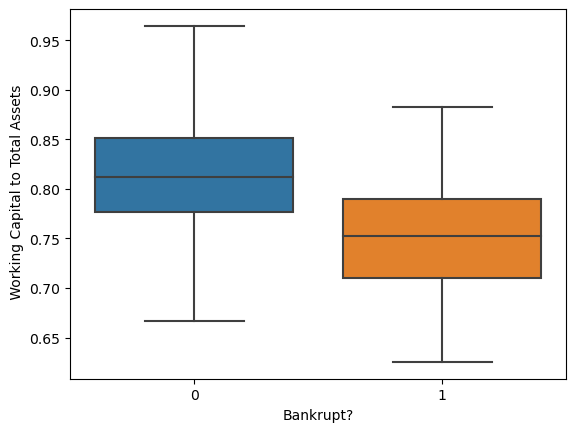

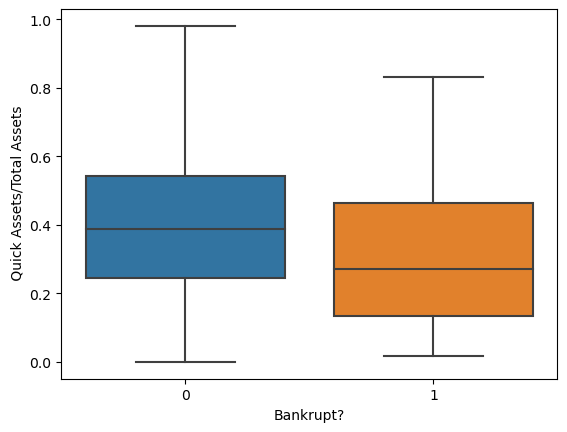

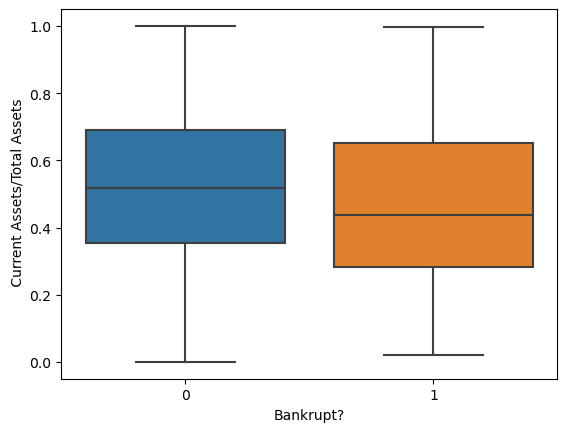

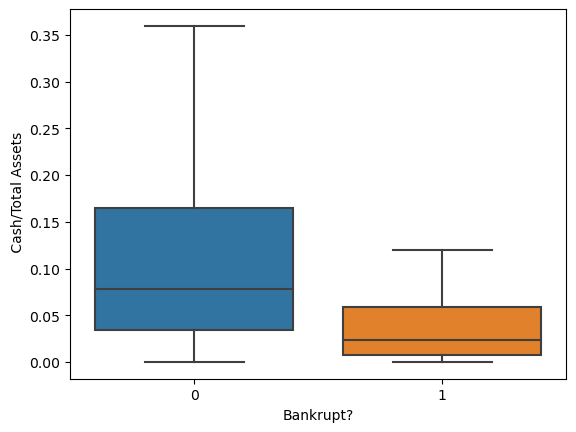

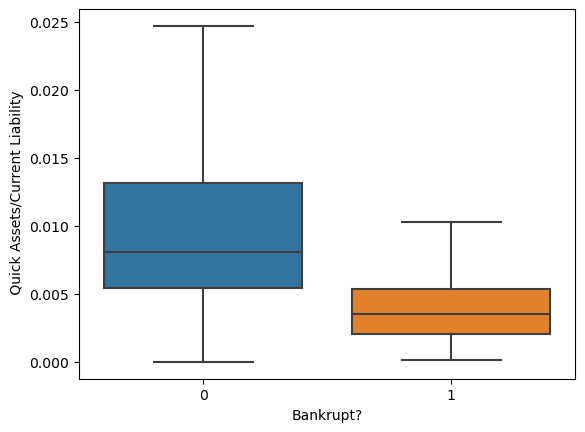

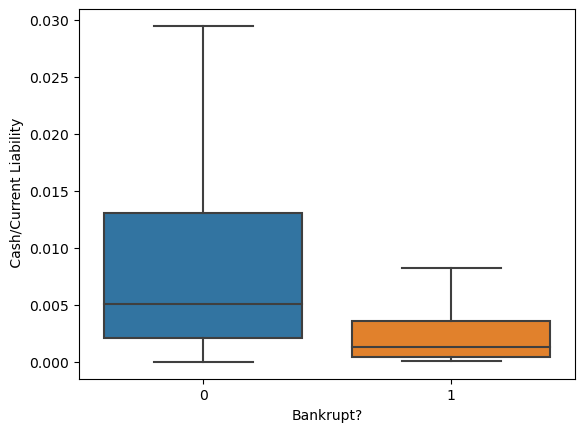

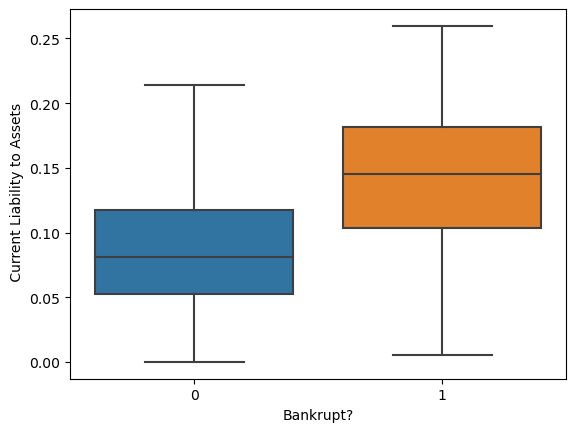

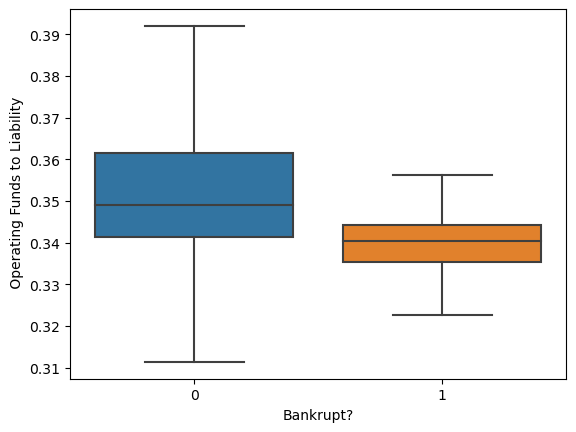

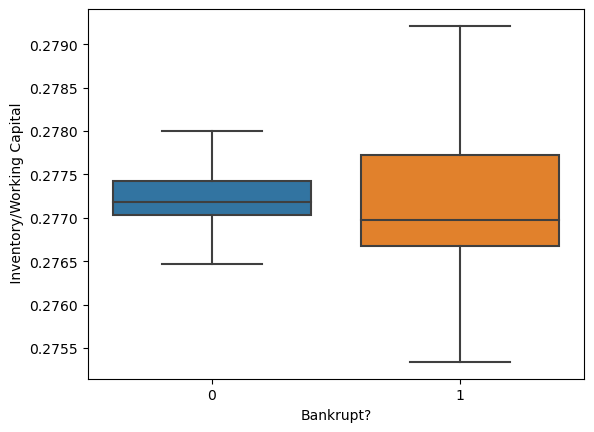

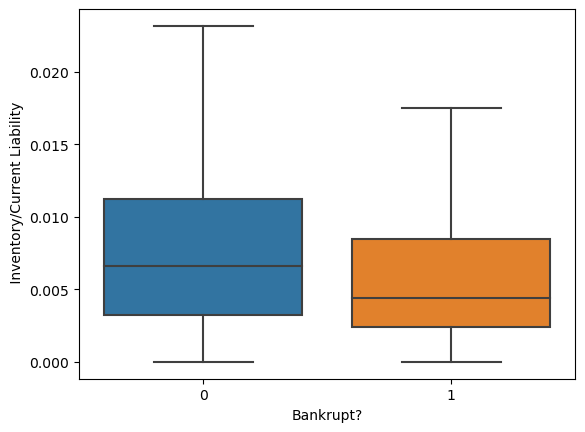

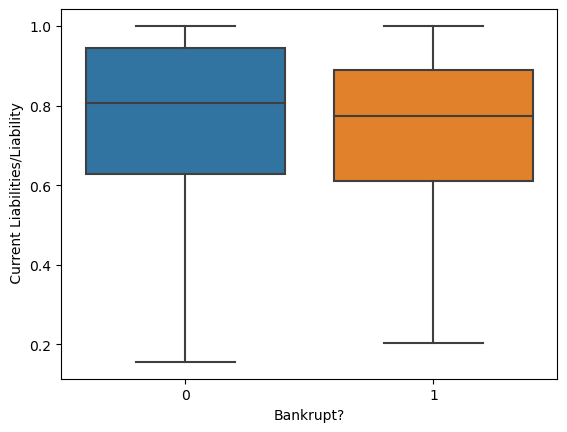

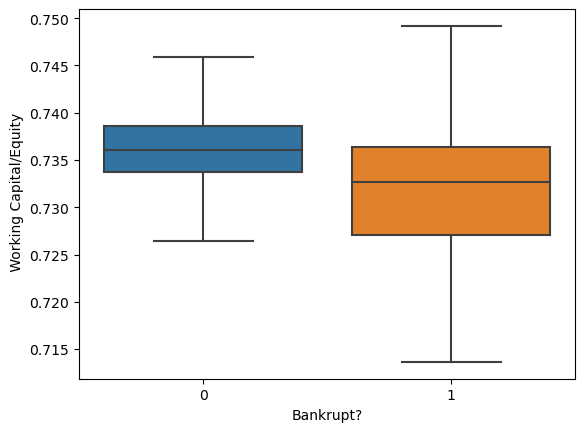

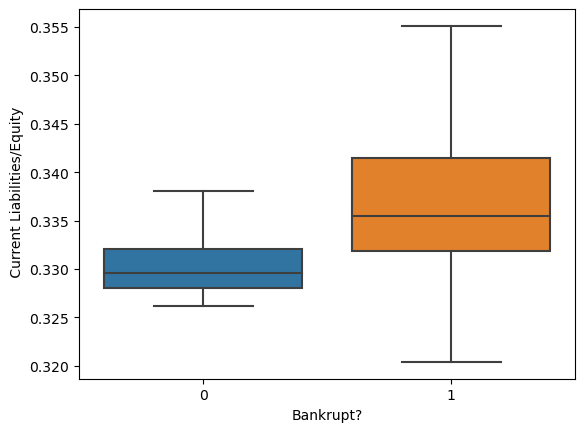

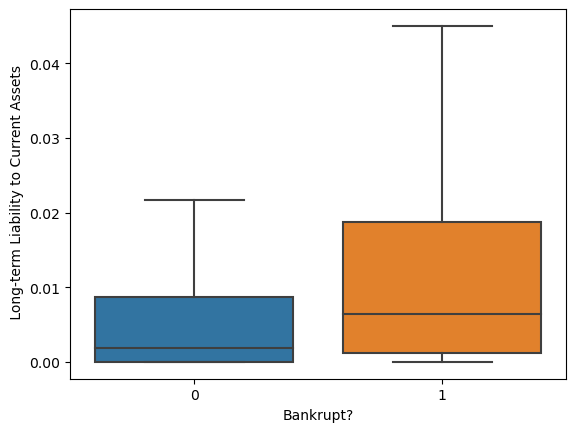

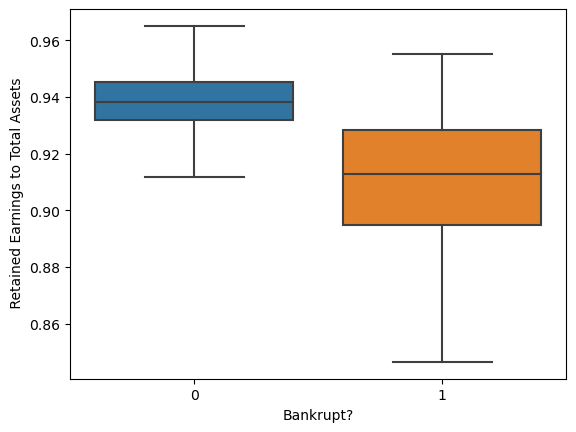

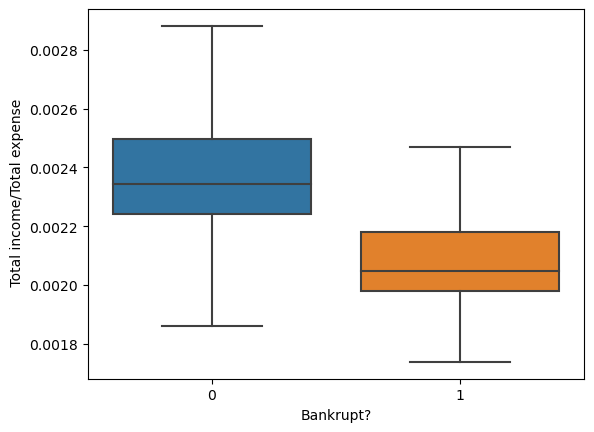

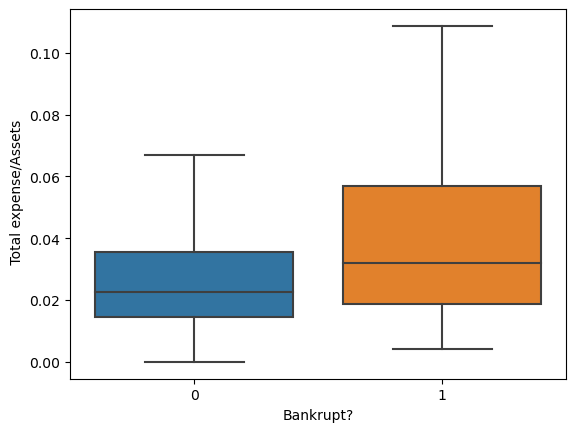

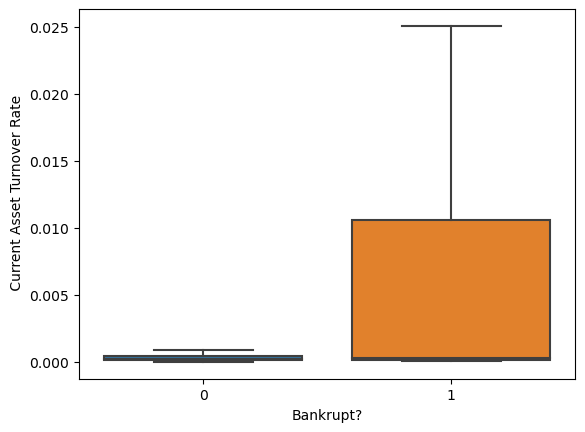

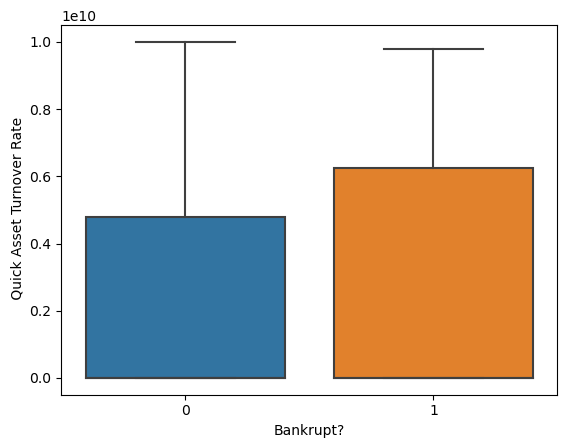

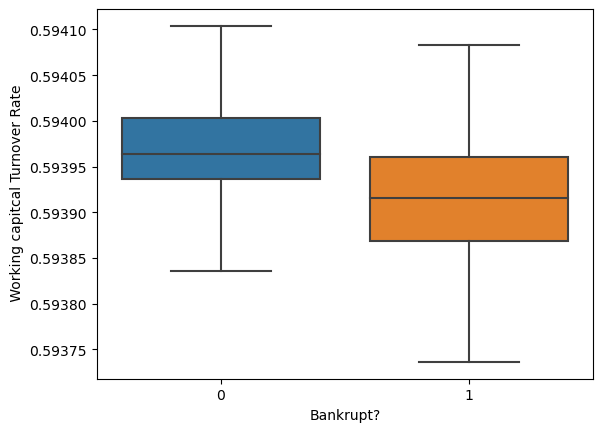

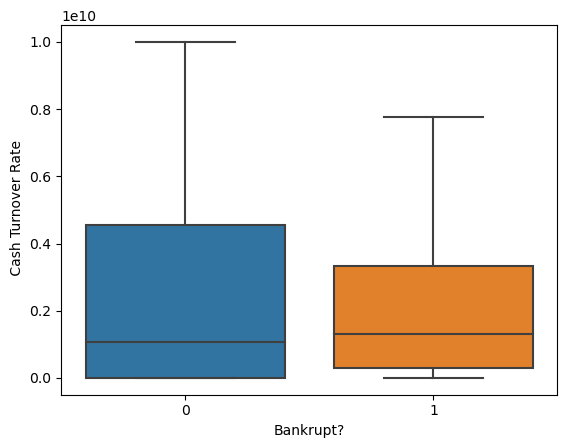

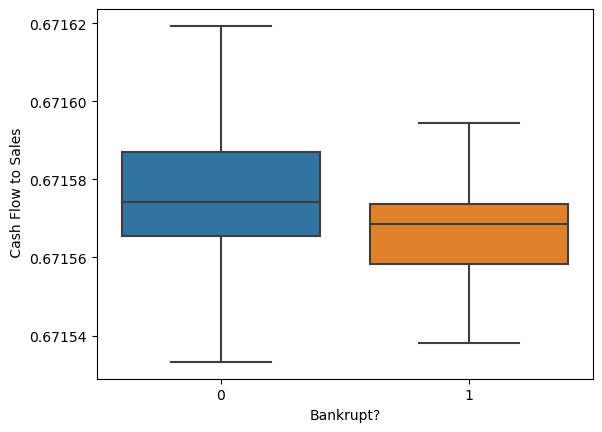

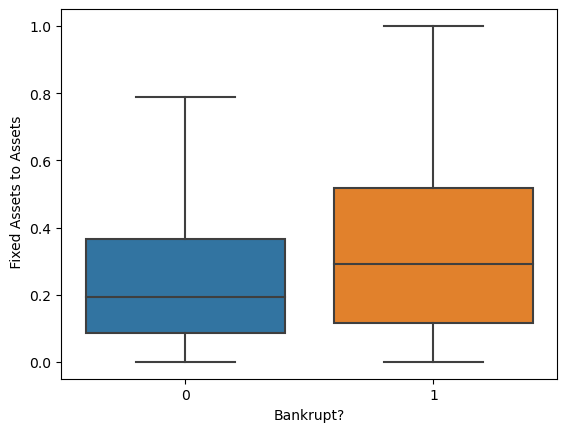

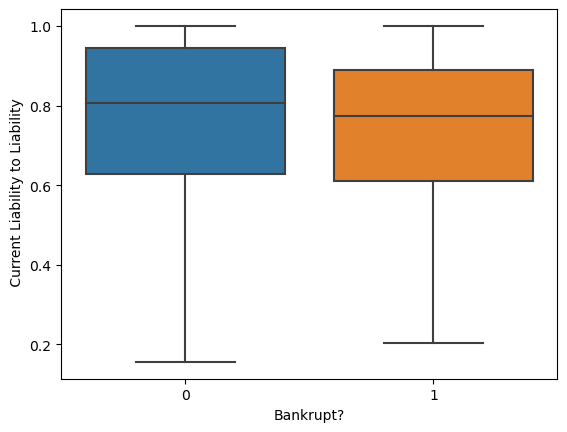

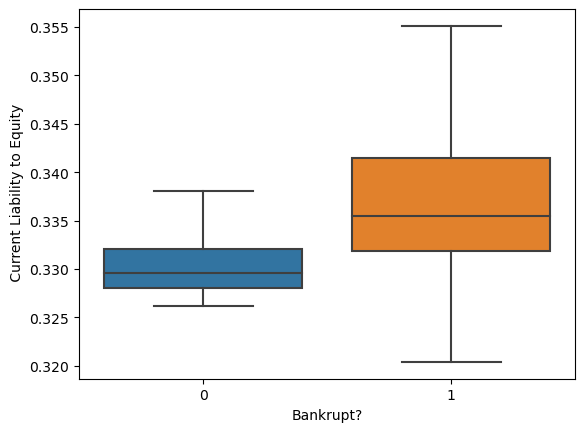

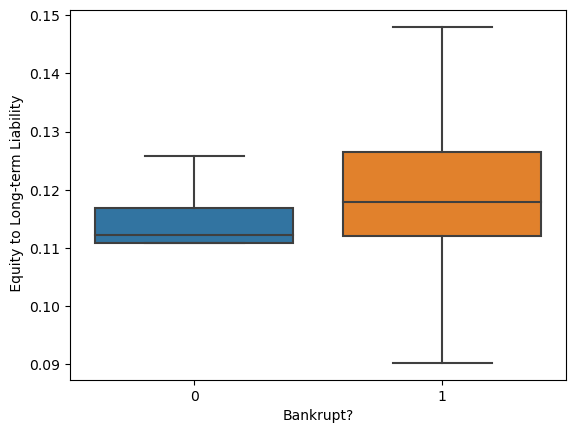

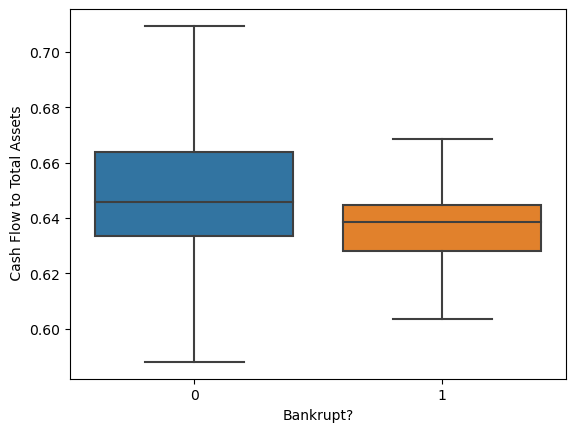

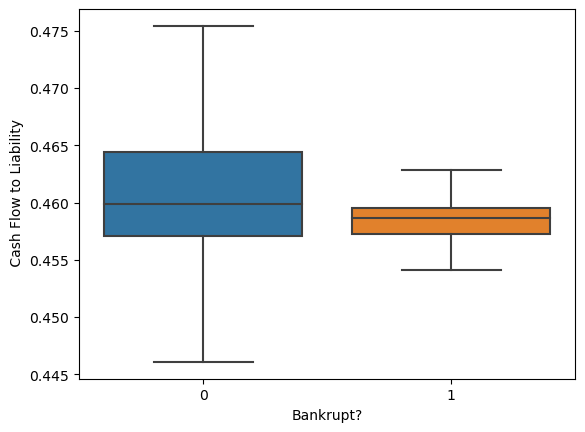

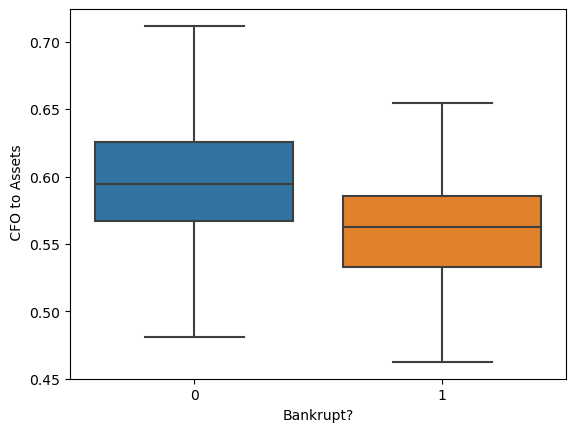

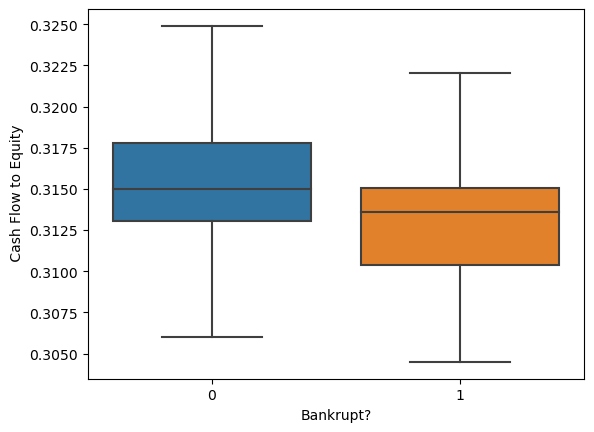

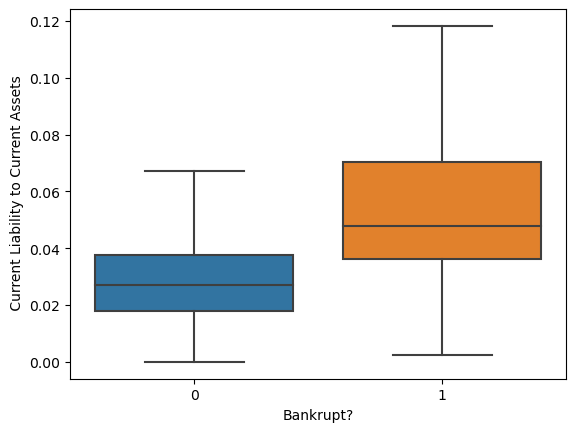

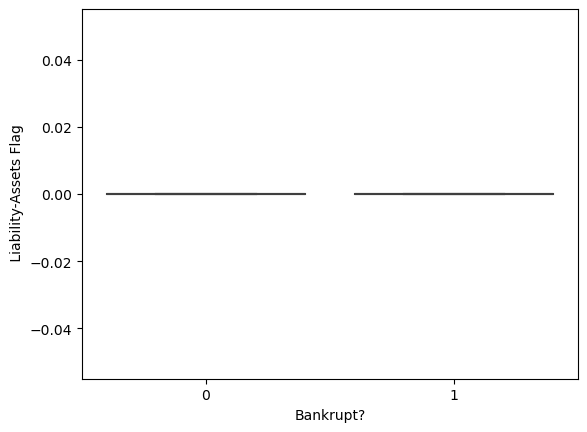

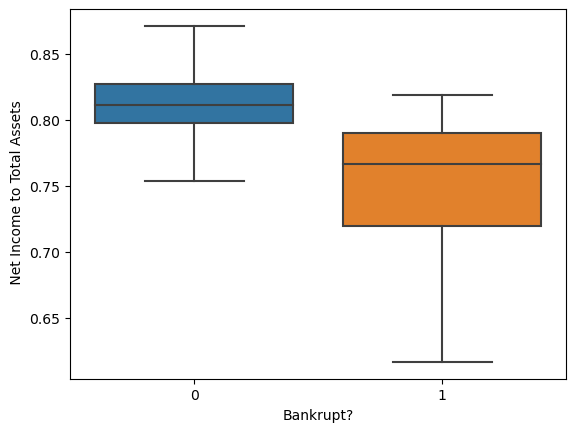

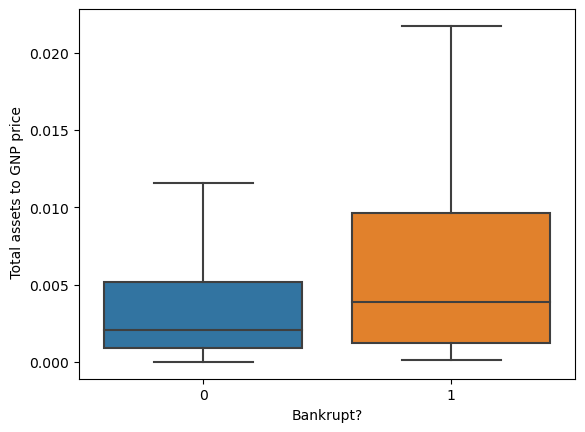

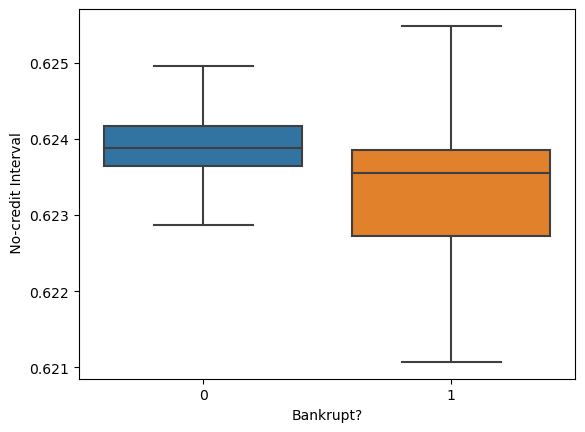

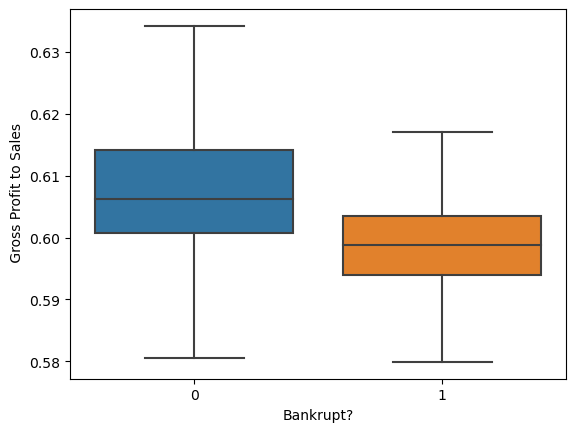

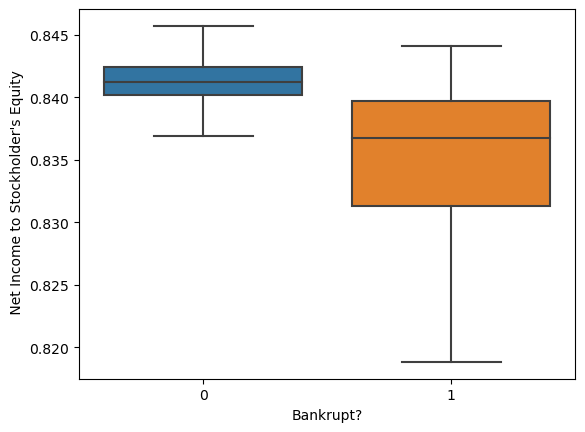

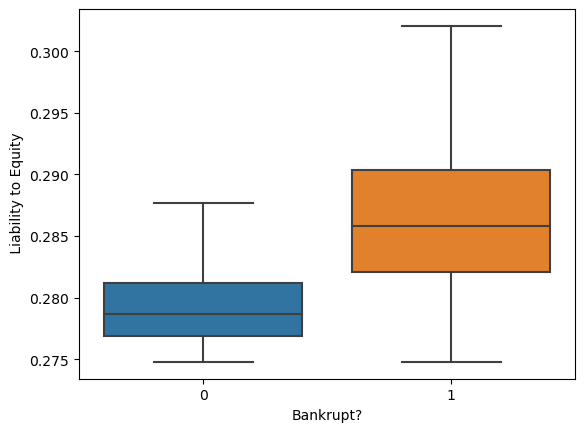

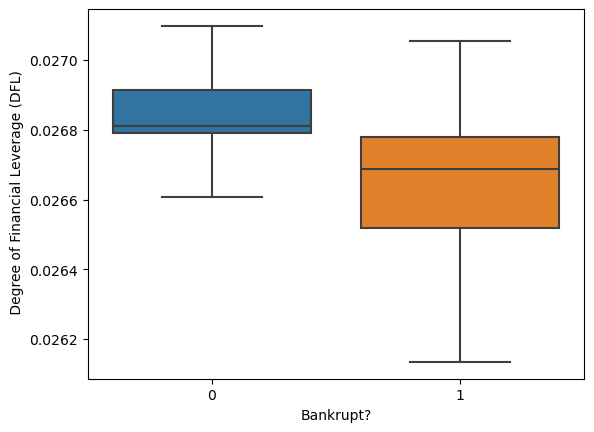

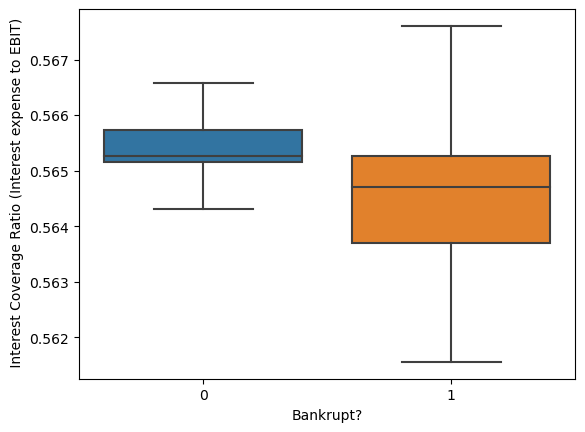

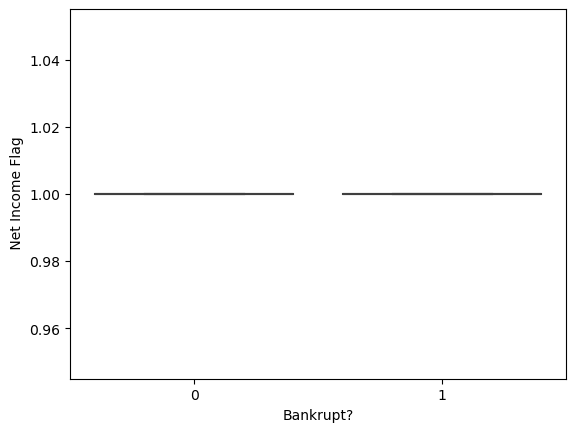

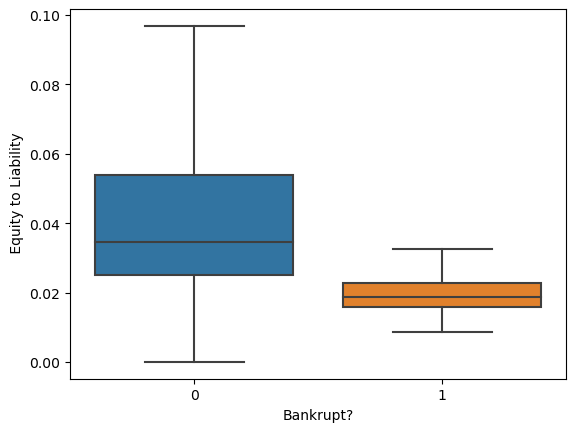

In [96]:
for i in range(len(company_df.columns)):
    if company_df.columns[i]!='Bankrupt?':
        sns.boxplot(data=company_df,y=company_df.columns[i],x='Bankrupt?',showfliers=False)
        plt.show()
    

In [97]:
drop_columns=[' Net Income Flag',' Liability-Assets Flag',' Quick Asset Turnover Rate',' Fixed Assets Turnover Frequency',' Inventory Turnover Rate (times)',' Contingent liabilities/Net worth', ' Tax rate (A)', ' Operating Expense Rate',' Net Worth Turnover Rate (times)', ' Current Liabilities/Liability', ' Current Liability to Liability',' Current Assets/Total Assets']


In [98]:
company_df.drop(drop_columns,axis=1,inplace=True)

In [99]:
len(company_df.columns)

84

In [100]:
company_df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',

In [101]:
X=company_df.drop('Bankrupt?',axis=1)
y=company_df['Bankrupt?']

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

## Oversampling the data

In [103]:
from imblearn.over_sampling import SMOTE
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

## Undersampling the data

In [104]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Principal Component Analysis Oversampled Data

In [105]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [106]:
X_train_pca

array([[-1.62427728e+09,  1.31980141e+09,  4.20611442e+08,
         2.56663112e+09],
       [-1.91188949e+09,  1.59354135e+09, -1.82080690e+09,
         4.00063969e+09],
       [-2.02141120e+09,  2.71263747e+09, -2.50946335e+08,
         5.84566654e+09],
       ...,
       [-1.30633465e+09, -3.79573797e+08, -2.34015688e+09,
        -9.20294965e+08],
       [-1.12880437e+09, -8.13371743e+08,  4.30491843e+09,
        -1.79166302e+09],
       [-2.17628066e+09, -4.72417187e+07,  5.01042171e+09,
         3.69929418e+09]])

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [108]:
y_pred=classifier_rf.predict(X_test_pca)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1320
           1       0.07      0.25      0.11        44

    accuracy                           0.87      1364
   macro avg       0.52      0.57      0.52      1364
weighted avg       0.94      0.87      0.90      1364



<Axes: >

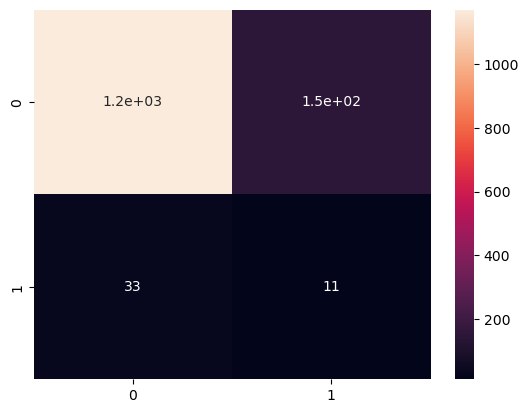

In [110]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [111]:
y_pred_train=classifier_rf.predict(X_train_pca)

In [112]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      1.00      1.00      5279

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558



<Axes: >

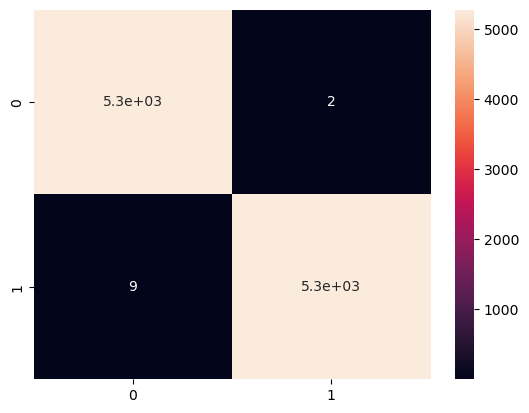

In [113]:
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True)

## Principal Component Analysis UnderSampled Data

In [114]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

X_train_pca2 = pca.fit_transform(X_train_under)
X_test_pca2 = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


# HyperParameter Tuning

In [115]:
random_grid={'bootstrap': [True, False],
 'max_depth': [5,10, 15, 20 ],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200]}

## Randomized Search CV OverSampled Data

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
rf=RandomForestClassifier()

In [118]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, scoring='recall', random_state=42, n_jobs = -1)

In [119]:
rf_random.fit(X_train_pca, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   4.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   4.3s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   3.0s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   5.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   5.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   4.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END bootstrap=True, max_depth=20, max_f

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   8.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   5.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   2.3s
[CV] END bootstrap=True, max_depth=5, max_featu

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   5.3s
[CV] END bootstrap=True, max_depth=5, max_feat

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   5.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   4.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.7s
[CV] END bootstrap=False, max_depth=20, max_

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   3.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   5.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   2.3s
[CV] END bootstrap=True, max_depth=5, max_featu

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='recall', verbose=2)

In [120]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}

In [121]:
classifier_rf = RandomForestClassifier(random_state=42, n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 20,
 bootstrap = False)
classifier_rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [122]:
y_pred=classifier_rf.predict(X_test_pca)

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1320
           1       0.06      0.23      0.10        44

    accuracy                           0.87      1364
   macro avg       0.52      0.56      0.51      1364
weighted avg       0.94      0.87      0.90      1364



<Axes: >

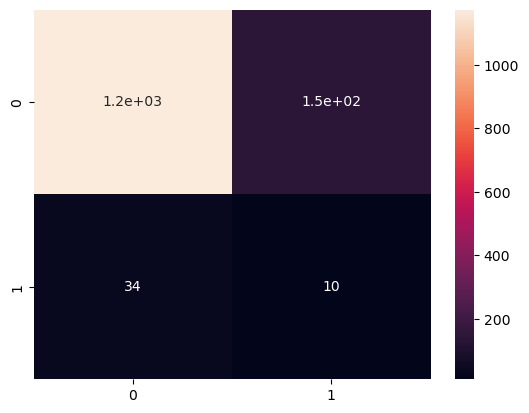

In [124]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [125]:
y_train.value_counts()

0    5279
1    5279
Name: Bankrupt?, dtype: int64

## Randomized Search CV Undersampled Data

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
rf=RandomForestClassifier()

In [128]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, scoring='recall', random_state=42, n_jobs = -1)

In [129]:
rf_random.fit(X_train_pca2, y_train_under)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   6.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   5.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   5.9s
[CV] END bootstrap=True, max_depth=10, m

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   5.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   4.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   3.6s
[CV] END bootstrap=True, max_depth=10, max_fe

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   6.3s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   2.9s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   3.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   3.4s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   3.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_fe

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   3.5s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   4.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   2.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_fea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   3.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   3.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END bootstrap=False, max_depth=5, max_feat

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='recall', verbose=2)

In [130]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

In [131]:
classifier_rf = RandomForestClassifier(random_state=42, n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 20,
 bootstrap = False)
classifier_rf.fit(X_train_pca2, y_train_under)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [132]:
y_pred=classifier_rf.predict(X_test_pca2)

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1320
           1       0.06      0.23      0.10        44

    accuracy                           0.87      1364
   macro avg       0.52      0.56      0.51      1364
weighted avg       0.94      0.87      0.90      1364



<Axes: >

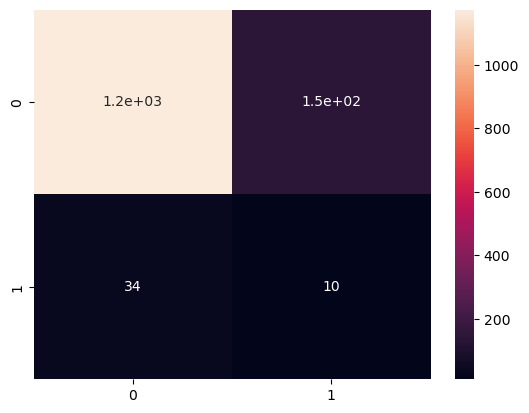

In [134]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [135]:
y_train.value_counts()

0    5279
1    5279
Name: Bankrupt?, dtype: int64

In [137]:
! pip install imbalanced-learn

In [139]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(
    n_estimators=100, random_state=0, sampling_strategy="all", replacement=True
)
brf.fit(X_train_pca, y_train)

BalancedRandomForestClassifier(random_state=0, replacement=True,
                               sampling_strategy='all')

In [141]:
y_pred=brf.predict(X_test_pca)

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1320
           1       0.07      0.25      0.11        44

    accuracy                           0.87      1364
   macro avg       0.52      0.57      0.52      1364
weighted avg       0.94      0.87      0.90      1364



<Axes: >

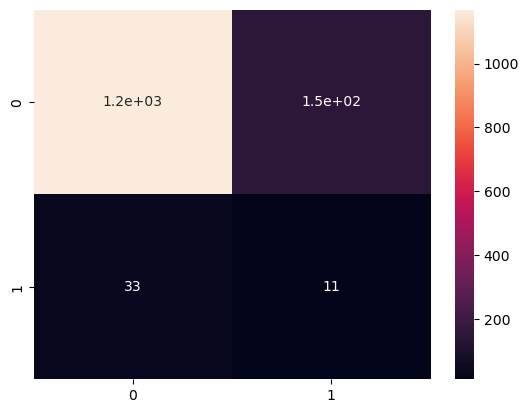

In [143]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

## SMOTEENN

In [144]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_pca, y_train)

In [145]:
classifier_rf = RandomForestClassifier(random_state=42, n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 20,
 bootstrap = False)
classifier_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [146]:
y_pred=classifier_rf.predict(X_test_pca)

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1320
           1       0.08      0.41      0.14        44

    accuracy                           0.84      1364
   macro avg       0.53      0.63      0.53      1364
weighted avg       0.95      0.84      0.89      1364



<Axes: >

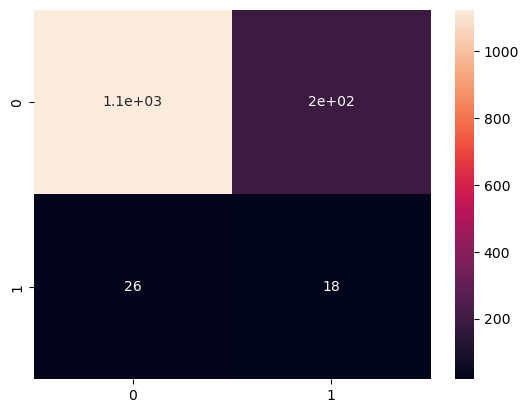

In [148]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

## SMOTETomek

In [149]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_pca, y_train)

In [150]:
classifier_rf = RandomForestClassifier(random_state=42, n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 20,
 bootstrap = False)
classifier_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [151]:
y_pred=classifier_rf.predict(X_test_pca)

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1320
           1       0.05      0.18      0.08        44

    accuracy                           0.87      1364
   macro avg       0.51      0.53      0.50      1364
weighted avg       0.94      0.87      0.90      1364



<Axes: >

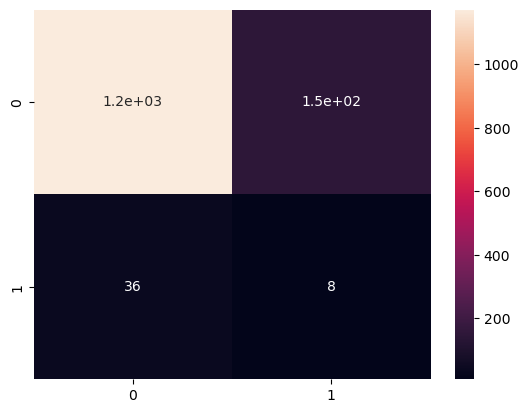

In [153]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)